In [59]:
import pandas as pd
import numpy as np

In [60]:
raw_df = pd.read_csv('credit_data.csv')

In [61]:
# drop unneeded columns
raw_df.drop(columns=['Unnamed: 0'], inplace=True)

# current col names are X1, X2...add better col names
columns = ['Limit','Sex','Education','Marriage','Age','Hist_6',\
           'Hist_5','Hist_4','Hist_3','Hist_2','Hist_1','Bill_6',\
           'Bill_5','Bill_4','Bill_3','Bill_2','Bill_1','Pay_6',\
           'Pay_5','Pay_4','Pay_3','Pay_2','Pay_1','Default']
raw_df.columns = columns

# drop header from first row
raw_df = raw_df.drop([0]).reset_index()

# re-order the columns
columns=['Default','Limit','Sex','Education','Marriage','Age',\
         'Bill_1','Bill_2','Bill_3','Bill_4','Bill_5','Bill_6',\
         'Pay_1','Pay_2','Pay_3','Pay_4','Pay_5','Pay_6',\
         'Hist_1','Hist_2','Hist_3','Hist_4','Hist_5','Hist_6']
raw_df = raw_df[columns]

# replace encoded features with categorical values
raw_df = raw_df.astype(int)
raw_df['Sex'].replace([1,2],['Male','Female'], inplace=True)
raw_df['Education'].replace([0,1,2,3,4,5,6],['Others','Graduate','University','High_School','Others','Others','Others'], inplace=True)
raw_df['Marriage'].replace([0,1,2,3],['Others','Married','Single','Others'], inplace=True)

In [62]:
raw_df

,Default,Limit,Sex,Education,Marriage,Age,Bill_1,Bill_2,Bill_3,Bill_4,...,Pay_3,Pay_4,Pay_5,Pay_6,Hist_1,Hist_2,Hist_3,Hist_4,Hist_5,Hist_6
0,1,20000,Female,University,Married,24,0,0,0,689,...,0,0,689,0,-2,-2,-1,-1,2,2
1,1,120000,Female,University,Single,26,3261,3455,3272,2682,...,1000,1000,1000,0,2,0,0,0,2,-1
2,0,90000,Female,University,Single,34,15549,14948,14331,13559,...,1000,1000,1500,1518,0,0,0,0,0,0
3,0,50000,Female,University,Married,37,29547,28959,28314,49291,...,1100,1200,2019,2000,0,0,0,0,0,0
4,0,50000,Male,University,Married,57,19131,19146,20940,35835,...,9000,10000,36681,2000,0,0,0,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,220000,Male,High_School,Married,39,15980,31237,88004,208365,...,3047,5003,20000,8500,0,0,0,0,0,0
29996,0,150000,Male,High_School,Single,43,0,5190,8979,3502,...,129,8998,3526,1837,0,0,-1,-1,-1,-1
29997,1,30000,Male,University,Single,37,19357,20582,20878,2758,...,4200,22000,0,0,0,0,-1,2,3,4
29998,1,80000,Male,High_School,Married,41,48944,11855,52774,76304,...,1926,1178,3409,85900,-1,0,0,0,-1,1


In [63]:
raw_df['Bill_1_frac'] = raw_df['Bill_1'] / raw_df['Limit']
raw_df['Bill_2_frac'] = raw_df['Bill_2'] / raw_df['Limit']
raw_df['Bill_3_frac'] = raw_df['Bill_3'] / raw_df['Limit']
raw_df['Bill_4_frac'] = raw_df['Bill_4'] / raw_df['Limit']
raw_df['Bill_5_frac'] = raw_df['Bill_5'] / raw_df['Limit']
raw_df['Bill_6_frac'] = raw_df['Bill_6'] / raw_df['Limit']
raw_df['sum_frac_cl'] = raw_df['Bill_1_frac'] + raw_df['Bill_2_frac'] +\
raw_df['Bill_3_frac'] + raw_df['Bill_4_frac'] + raw_df['Bill_5_frac'] + raw_df['Bill_6_frac']

In [64]:
# parse indices for default vs no default cases:
def_ind = raw_df.index[raw_df['Default']==1]
nodef_ind = raw_df.index[raw_df['Default']==0]

In [65]:
print(len(def_ind))
print(len(nodef_ind))

6636
23364


In [66]:
# get a random sample of n default cases, where n = num no-default cases
random.seed(1)
upsampled_ind = random.choices(def_ind, k=len(nodef_ind))

In [67]:
len(upsampled_ind)

23364

In [68]:
# make a df with the no-default cases
new_df = raw_df.iloc[nodef_ind]
# append the new_df with the upsampled default cases
new_df = new_df.append(raw_df.iloc[upsampled_ind])
# clean
new_df = new_df.reset_index()
new_df.drop(columns='index', inplace=True)

In [69]:
import matplotlib.pyplot as plt

In [70]:
default_df = new_df[new_df['Default']==1]
nodefault_df = new_df[new_df['Default']==0]

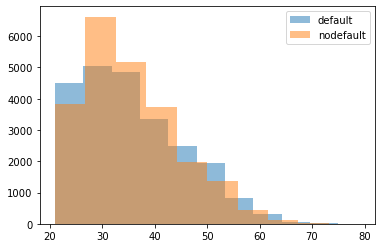

In [71]:
plt.hist(default_df['Age'], bins=10, alpha=0.5, label='default')
plt.hist(nodefault_df['Age'], bins=10, alpha=0.5, label='nodefault')
plt.legend();

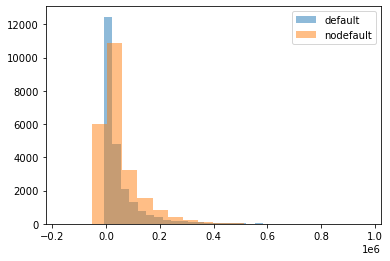

In [72]:
plt.hist(default_df['Bill_6'], bins=20, alpha=0.5, label='default')
plt.hist(nodefault_df['Bill_6'], bins=20, alpha=0.5, label='nodefault')
plt.legend();

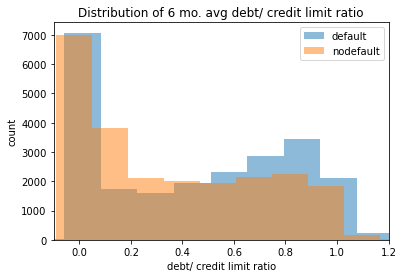

In [81]:
plt.hist(default_df['sum_frac_cl']/6, bins=20, alpha=0.5, label='default')
plt.hist(nodefault_df['sum_frac_cl']/6, bins=40, alpha=0.5, label='nodefault')
plt.xlim([-.1,1.2])
plt.xlabel('debt/ credit limit ratio')
plt.ylabel('count')
plt.title('Distribution of 6 mo. avg debt/ credit limit ratio')
plt.legend();